# Breast cancer data
- feature가 30개
- 차원축소(2, 5, 10) - 설명력
- PCA 전후 분류(Logistic Regression) 비교

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. 데이터 전처리

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
cancer_std = scaler.transform(cancer.data)

2. 차원축소

* 2차원

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)
cancer_pca[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [16]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.44272026, 0.18971182]), 0.6324320765155933)

* 5차원

In [14]:
pca5 = PCA(n_components=5)
cancer_pca5 = pca5.fit_transform(cancer_std)
pca5.explained_variance_ratio_, sum(pca5.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 0.8473427431679009)

* 10차원

In [15]:
pca10 = PCA(n_components=10)
cancer_pca10 = pca10.fit_transform(cancer_std)
pca10.explained_variance_ratio_, sum(pca10.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 0.9515688143352449)

In [22]:
# 반복문으로 한방에

for n in [2, 5, 10]:
    pca = PCA(n_components=n)
    pca.fit_transform(cancer_std)
    print(f'{n}차원 축소의 설명력 : {sum(pca.explained_variance_ratio_):.4f}')


2차원 축소의 설명력 : 0.6324
5차원 축소의 설명력 : 0.8473
10차원 축소의 설명력 : 0.9516


3. PCA 전후 분류비교 - Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2021
)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9649122807017544

4. 시각화

In [23]:
cancer_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [24]:
df['PC1'] = cancer_pca[:, 0]
df['PC2'] = cancer_pca[:, 1]
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,PC1,PC2
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,9.192837,1.948583
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,2.387802,-3.768172
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,5.733896,-1.075174
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,7.122953,10.275589
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,3.935302,-1.948072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,6.439315,-3.576817
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,3.793382,-3.584048
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,1.256179,-1.902297
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,10.374794,1.672010


In [26]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

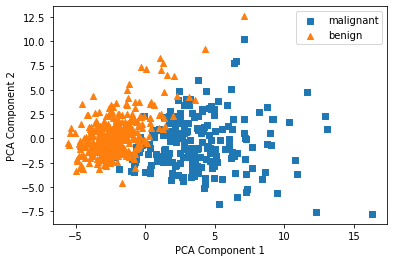

In [29]:
markers = ['s', '^']

for i, markers in enumerate(markers):
    xdata = df[df['target'] == i]['PC1']
    ydata = df[df['target'] == i]['PC2']
    plt.scatter(x = xdata, y = ydata, marker = markers, label = cancer.target_names[i])
plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()